In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/persons_pics_train.csv' , sep = ',')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,2905,2906,2907,2908,2909,2910,2911,2912,2913,label
0,0.379085,0.312418,0.352941,0.445752,0.466667,0.473203,0.484967,0.513725,0.545098,0.571242,...,0.597386,0.620915,0.732026,0.852288,0.921569,0.937255,0.941176,0.950327,0.946405,John Ashcroft
1,0.450980,0.466667,0.512418,0.509804,0.450980,0.458824,0.516340,0.571242,0.607843,0.618301,...,0.430065,0.453595,0.679739,0.934640,0.985621,0.981699,0.963399,0.938562,0.874510,Ariel Sharon
2,0.589542,0.614379,0.688889,0.729412,0.738562,0.775163,0.789543,0.806536,0.820915,0.837908,...,0.733333,0.854902,0.937255,0.624837,0.128105,0.082353,0.107190,0.095425,0.100654,Colin Powell
3,0.390850,0.432680,0.499346,0.562091,0.597386,0.644444,0.670588,0.650980,0.637908,0.639216,...,0.713726,0.898039,0.968627,0.959477,0.832680,0.443137,0.266667,0.303268,0.313725,Jean Chretien
4,0.645752,0.626144,0.605229,0.585621,0.602614,0.664052,0.701961,0.709804,0.733333,0.771242,...,0.115033,0.129412,0.132026,0.129412,0.155556,0.171242,0.167320,0.176471,0.183007,Colin Powell


In [6]:
def get_img_by_row(row):
  return row.drop('label').astype(float).to_numpy().reshape(62, 47), row['label']

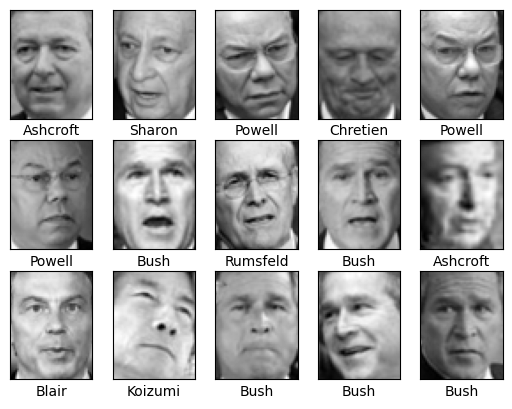

In [7]:
frg, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
  img, lbl = get_img_by_row(data.iloc[i])
  axi.imshow(img, cmap='gray')
  axi.set(xticks=[], yticks=[],
          xlabel=lbl.split()[-1])
plt.savefig('person_pics_img_for_description.png', dpi=300, bbox_inches='tight')

(-0.5, 46.5, 61.5, -0.5)

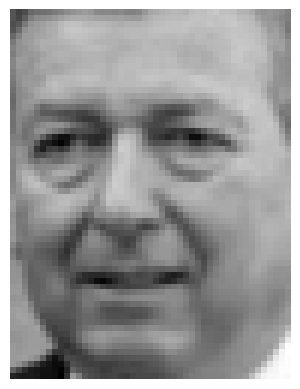

In [8]:
plt.imshow(data.iloc[0].drop('label').astype(float).to_numpy().reshape(62,47), cmap='gray')
plt.axis('off')

In [9]:
num_unique_person = data['label'].nunique()
print('Число уникальных людей:', num_unique_person)

Число уникальных людей: 12


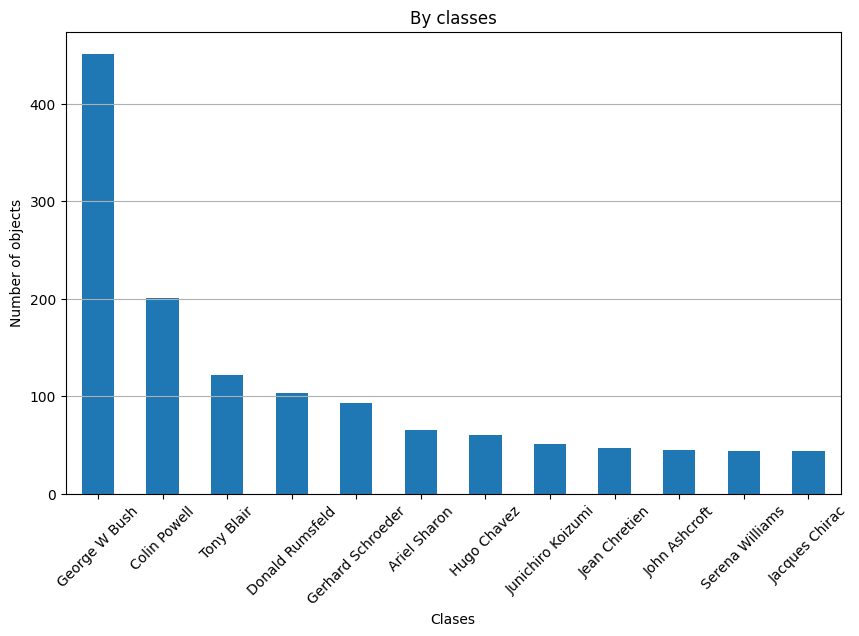

In [10]:
plt.figure(figsize=(10,6))
data['label'].value_counts().plot(kind='bar')
plt.title('By classes')
plt.xlabel('Clases')
plt.ylabel('Number of objects')
plt.xticks(rotation=45)
plt.grid(axis='y')

In [11]:
class_counts = data['label'].value_counts()
total_samples = len(data)
ger_shroe_rat = class_counts['Gerhard Schroeder'] / total_samples
print('Part objects:', ger_shroe_rat)

Part objects: 0.07013574660633484


In [12]:
mean_vectors = data.groupby('label').mean()
jk_vector = mean_vectors.loc['Junichiro Koizumi']
print('Vectot coordinae:', jk_vector[0])

Vectot coordinae: 0.2683839608235294


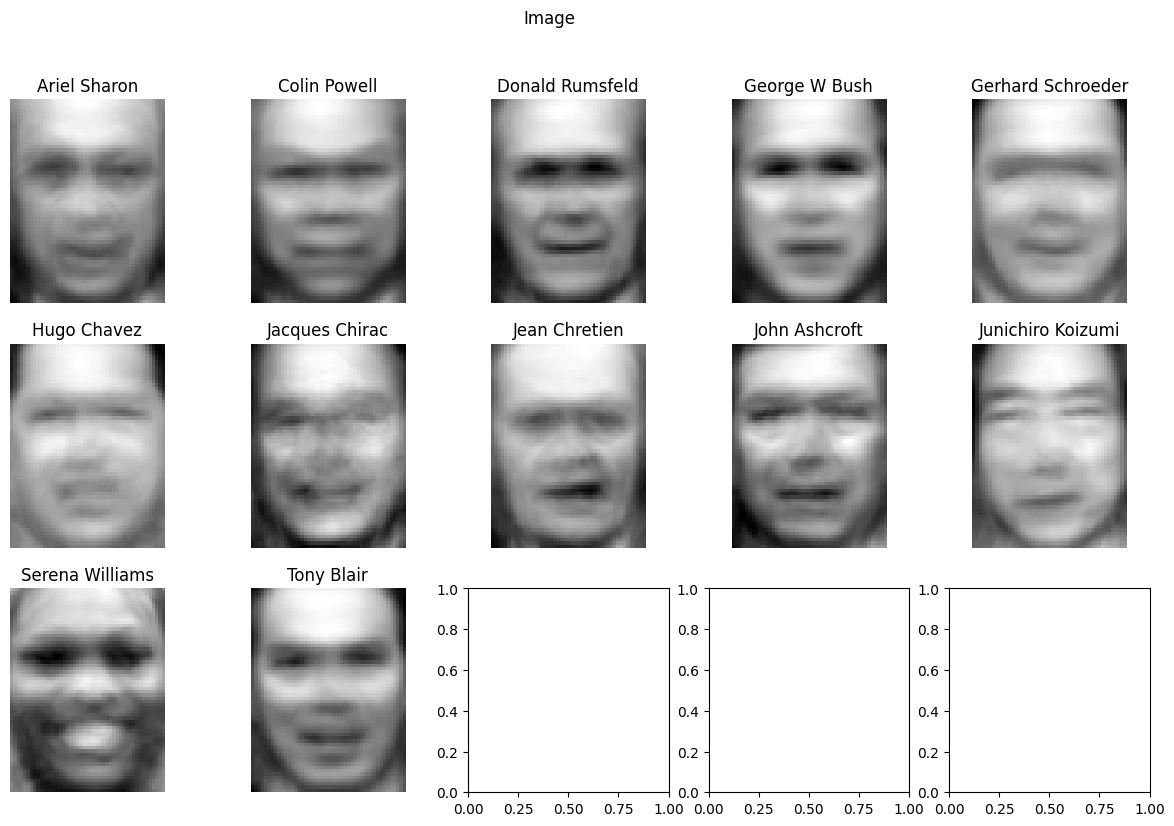

In [13]:
fig, axes = plt.subplots(3, 5, figsize=(15,9))
fig.suptitle('Image')
for i ,(label, vector) in enumerate(mean_vectors.iterrows()):
  ax = axes[i //5, i%5]
  ax.imshow(vector.values.reshape(62,47), cmap='gray')
  ax.set_title(label)
  ax.axis('off')
plt.show()

In [14]:
from sklearn.metrics.pairwise import cosine_similarity

In [15]:
jacques_vector = mean_vectors.loc['Jacques Chirac'].values.reshape(1, -1)
junichiro_vector = mean_vectors.loc['Junichiro Koizumi'].values.reshape(1, -1)
cosinus = cosine_similarity(jacques_vector, junichiro_vector)
print('Similarity: ', cosinus[0][0])

Similarity:  0.9947457960456928


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

In [17]:
X = data.drop(columns=['label'])
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11, stratify=y)

In [18]:
model = SVC(kernel='linear', random_state=11)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
f1_score = f1_score(y_test, y_pred, average='weighted')
print('Quality:', f1_score)

Quality: 0.7838258158689967


In [19]:
tuned_parameters = [{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000], 'class_weight': [None, 'balanced'], 'random_state':[11]}]


cv = GridSearchCV(SVC(), tuned_parameters, refit=True, verbose=3)
cv.fit(X, y)
best_params = cv.best_params_
print('Best parametrs:', best_params)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=11;, score=0.805 total time=   2.4s
[CV 2/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=11;, score=0.808 total time=   2.5s
[CV 3/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=11;, score=0.808 total time=   2.0s
[CV 4/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=11;, score=0.789 total time=   2.1s
[CV 5/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=11;, score=0.796 total time=   2.5s
[CV 1/5] END C=1, class_weight=None, gamma=0.001, kernel=poly, random_state=11;, score=0.395 total time=   2.9s
[CV 2/5] END C=1, class_weight=None, gamma=0.001, kernel=poly, random_state=11;, score=0.385 total time=   3.6s
[CV 3/5] END C=1, class_weight=None, gamma=0.001, kernel=poly, random_state=11;, score=0.370 total time=   2.9s
[CV 4/5] END C=1, class_weight=N

In [20]:
bect_C = best_params['C']
best_gamma = best_params['gamma']
best_kernel = best_params['kernel']
print('Meanind C:' ,bect_C )
print('Meanind gamma:' , best_gamma)
print('Meanind kernel:' ,best_kernel)

Meanind C: 1000
Meanind gamma: 0.001
Meanind kernel: rbf


In [21]:
y_pred1 = cv.predict(X_test)
f1 = f1_score(y_test, y_pred1, average='weighted')
print(f1)

TypeError: 'numpy.float64' object is not callable

In [22]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA(svd_solver='full')
pca.fit(X_train)
variance = pca.explained_variance_ratio_.cumsum()
n_components = (variance > 0.95).sum()
print('Require components: ',n_components )

Require components:  889


In [24]:
from sklearn.pipeline import Pipeline

In [25]:
pca = PCA(n_components=n_components,svd_solver='full')
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

tuned_parameters = [{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000], 'class_weight': [None, 'balanced'], 'random_state':[11]}]

In [26]:
pipeline = Pipeline([
    ('pca', PCA()),
    ('svm', SVC())
])

cv = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='f1_weighted', verbose=3)
cv.fit(X_train_pca, y_train)
best_params = cv.best_params_
print('Best Params', best_params)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=11;, score=0.807 total time=   0.3s
[CV 2/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=11;, score=0.786 total time=   0.3s
[CV 3/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=11;, score=0.766 total time=   0.3s
[CV 4/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=11;, score=0.792 total time=   0.4s
[CV 5/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=11;, score=0.762 total time=   0.3s
[CV 1/5] END C=1, class_weight=None, gamma=0.001, kernel=poly, random_state=11;, score=0.172 total time=   0.4s
[CV 2/5] END C=1, class_weight=None, gamma=0.001, kernel=poly, random_state=11;, score=0.176 total time=   0.4s
[CV 3/5] END C=1, class_weight=None, gamma=0.001, kernel=poly, random_state=11;, score=0.172 total time=   0.5s
[CV 4/5] END C=1, class_weight=N

In [29]:
bect_C = best_params['C']
best_gamma = best_params['gamma']
best_kernel = best_params['kernel']
print('Meanind C:' ,bect_C )
print('Meanind gamma:' , best_gamma)
print('Meanind kernel:' ,best_kernel)

Meanind C: 100
Meanind gamma: 0.001
Meanind kernel: rbf


In [31]:
pca =PCA(svd_solver='full')
pca.fit(X_train)

PCA(svd_solver='full')

In [33]:
explained_variance_ratio_cumsum = pca.explained_variance_ratio_.cumsum()
min_components = (explained_variance_ratio_cumsum > 0.95).sum()
min_components

889